In [1]:
#=========================================
# UNICARIOCA
# P�S GRADUA��O EM CI�NCIA DE DADOS
# FEA - EXERCICIO-02A 
#=========================================
# M�DIA - MEDIANA - MODA
#=========================================

In [2]:
#install.packages("readxl")
library(readxl)
require(moments)
require(e1071)
install.packages('outliers')
library(outliers)

Loading required package: moments

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘moments’”
Loading required package: e1071

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [34]:
#=====================================
#LEITURA DO ARQUIVO DE DADOS (XLSX)
tab <-read_excel("./FEA_EX_02A.xlsx",sheet="ex_01")
#=====================================

for (i in 1:3){
  print(tab[[i]])
}
tab

#ATRIBUI��O DAS VARI�VEIS varx-vary-varz
varx<- tab[[1]]
vary<- tab[[2]]
varz<- tab[[3]]
varx
vary
varz

#varx[1] = -40
#varx[1]

 [1]  1  1  1  1  1  1  1  2  2  2  2  3  3  3  4  4  4  5  6  6  7  8  9 10 11
[26] 12 13 15 16 18 20 22 24 27 30 33 37 40 45 50
 [1]  1.00  1.09  1.19  1.30  1.41  1.54  1.68  1.83  1.99  2.17  2.37  2.58
[13]  2.81  3.07  3.34  3.64  3.97  4.33  4.72  5.14  5.60  6.11  6.66  7.26
[25]  7.91  8.62  9.40 10.25 11.17 12.17 13.27 14.46 15.76 17.18 18.73 20.41
[37] 22.25 24.25 26.44 28.82
 [1]  0.60  0.67  0.75  0.81  0.91  1.00  1.11  1.25  1.36  1.50  1.67  1.88
[13]  2.00  2.31  2.50  2.73  3.00  3.33  3.75  4.29  5.00  5.00  6.00  7.50
[25]  7.50  7.50 10.00 10.00 10.00 15.00 15.00 15.00 15.00 30.00 30.00 30.00
[37] 30.00 30.00 30.00 30.00


Varx,Vary,Varz
<dbl>,<dbl>,<dbl>
1,1.00,0.60
1,1.09,0.67
1,1.19,0.75
1,1.30,0.81
1,1.41,0.91
1,1.54,1.00
1,1.68,1.11
2,1.83,1.25
2,1.99,1.36


[1]  1  1  1  1  1  1  1  2  2  2  2  3  3  3  4  4  4  5  6  6  7  8  9 10 11
[26] 12 13 15 16 18 20 22 24 27 30 33 37 40 45 50

[1]  1.00  1.09  1.19  1.30  1.41  1.54  1.68  1.83  1.99  2.17  2.37  2.58
[13]  2.81  3.07  3.34  3.64  3.97  4.33  4.72  5.14  5.60  6.11  6.66  7.26
[25]  7.91  8.62  9.40 10.25 11.17 12.17 13.27 14.46 15.76 17.18 18.73 20.41
[37] 22.25 24.25 26.44 28.82

[1]  0.60  0.67  0.75  0.81  0.91  1.00  1.11  1.25  1.36  1.50  1.67  1.88
[13]  2.00  2.31  2.50  2.73  3.00  3.33  3.75  4.29  5.00  5.00  6.00  7.50
[25]  7.50  7.50 10.00 10.00 10.00 15.00 15.00 15.00 15.00 30.00 30.00 30.00
[37] 30.00 30.00 30.00 30.00

In [9]:
#==============================
# ANALISE EXPLORATORIA DE DADOS 
#==============================
# VARIAVEL VARX 
#==============================
summary(varx)
q1x <-quantile(varx,c(0.25)) #1º QUARTL
q2x <-quantile(varx,c(0.50)) #2º QUARTL=MEDIANA
q3x <-quantile(varx,c(0.75)) #3º QUARTL

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     2.0     6.5    12.5    18.5    50.0 

In [15]:
print(paste('1º QUARTL ', q1x))
print(paste('2º QUARTL=MEDIANA ',q2x))
print(paste('3º QUARTL ',q3x))

[1] "1º QUARTL  2"
[1] "2º QUARTL=MEDIANA  6.5"
[1] "3º QUARTL  18.5"


In [20]:
#==============================================
#TIPO DA ASSIMETRIA - COMPARACAO MEDIA-MEDIANA
#==============================================
if (mean(varx) == median(varx)){
   print("SIMETRICA")
} else if (mean(varx) > median(varx)){
   print("ASSIMETRIA POSITIVA")
}else print("ASSIMETRIA NEGATIVA")

[1] "ASSIMETRIA POSITIVA"


In [21]:
#===============================================
#TIPO DA ASSIMETRIA - DIFEREN�A ENTRE OS QUARTIS
#===============================================
#COMPARA��O Q2-Q1 / Q3-Q2 
if (abs(q2x-q1x) == abs(q3x-q2x)){
  print("SIMITRICA")
} else if (abs(q3x-q2x) > abs(q2x-q1x)){    # (q3x-q2x) > (q2x-q1x)
  print("ASSIMETRIA POSITIVA")
}else print("ASSIMETRIA NEGATIVA")          # (q3x-q2x) < (q2x-q1x)

[1] "ASSIMETRIA POSITIVA"


In [24]:
#==============================
# AN�LISE EXPLORAT�RIA DE DADOS 
#==============================
# VARI�VEL VARY 
#==============================
summary(vary)
q1y <-quantile(vary,c(0.25))
q2y <-quantile(vary,c(0.50))
q3y <-quantile(vary,c(0.75))

cat("q1x =",q1y)
cat("q2x =",q2y)
cat("q3x =",q3y)

#paste('q1x= ',q1x)
#paste('q2x= ',q2x)
#paste('q3x= ',q3x)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.320   5.370   8.447  12.445  28.820 

q1x = 2.32q2x = 5.37q3x = 12.445

In [25]:
#==============================================
#TIPO DA ASSIMETRIA - COMPARA��O M�DIA-MEDIANA
#==============================================
if (mean(vary) == median(vary)){
  print("SIM�TRICA")
} else if (mean(vary) > median(vary)){     
  print("ASSIMETRIA POSITIVA")
}else print("ASSIMETRIA NEGATIVA")            


[1] "ASSIMETRIA POSITIVA"


In [26]:
#==============================================
#TIPO DA ASSIMETRIA - COMPARACAO Q2-Q1 / Q3-Q2
#==============================================
if (abs(q2y-q1y) == abs(q3y-q2y)){
  print("SIM�TRICA")
} else if (abs(q3y-q2y) > abs(q2y-q1y)){  # (q3y-q2y) > (q2y-q1y)
  print("ASSIMETRIA POSITIVA")
}else print("ASSIMETRIA NEGATIVA")        # (q3y-q2y) < (q2y-q1y)

[1] "ASSIMETRIA POSITIVA"


In [27]:
#==============================
# ANALISE EXPLORATORIA DE DADOS 
#==============================
# VARIAVEL VARZ 
#==============================
summary(varz)
q1z <-quantile(varz,c(0.25))
q2z <-quantile(varz,c(0.50))
q3z <-quantile(varz,c(0.75))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.600   1.627   4.645   9.398  15.000  30.000 

In [28]:
#=============================================
#TIPO DA ASSIMETRIA - COMPARACAO MEDIA-MEDIANA
#=============================================
if (mean(varz) == median(varz)){
  print("SIM�TRICA")
} else if (mean(varz) > median(varz)){    
  print("ASSIMETRIA POSITIVA")
}else print("ASSIMETRIA NEGATIVA")

[1] "ASSIMETRIA POSITIVA"


In [30]:
#=============================================
#TIPO DA ASSIMETRIA - COMPARACAO Q2-Q1 / Q3-Q2
#=============================================
if (abs(q2z-q1z) == abs(q3z-q2z)){
  print("SIM�TRICA")
} else if (abs(q3z-q2z) > abs(q2z-q1z)){    # (q3z-q2z) > (q2z-q1z)
  print("ASSIMETRIA POSITIVA")
}else print("ASSIMETRIA NEGATIVA")          # (q3z-q2z) < (q2z-q1z)    

[1] "ASSIMETRIA POSITIVA"


In [31]:
#================================================================
#GRAU DE ASSIMETRIA - COEFICIENTE MOMENTO DE ASSIMETRIA 
#LIMITES <-1 FORTE /  (0,+0.15) OU (-0.15, 0) MODERADA / >+1 FORTE   
#================================================================
skewness(varx)   # 1,27   FORTE
skewness(vary)   # 1,11   FORTE
skewness(varz)   # 1,17   FORTE

[1] 1.224971

[1] 1.070003

[1] 1.131439

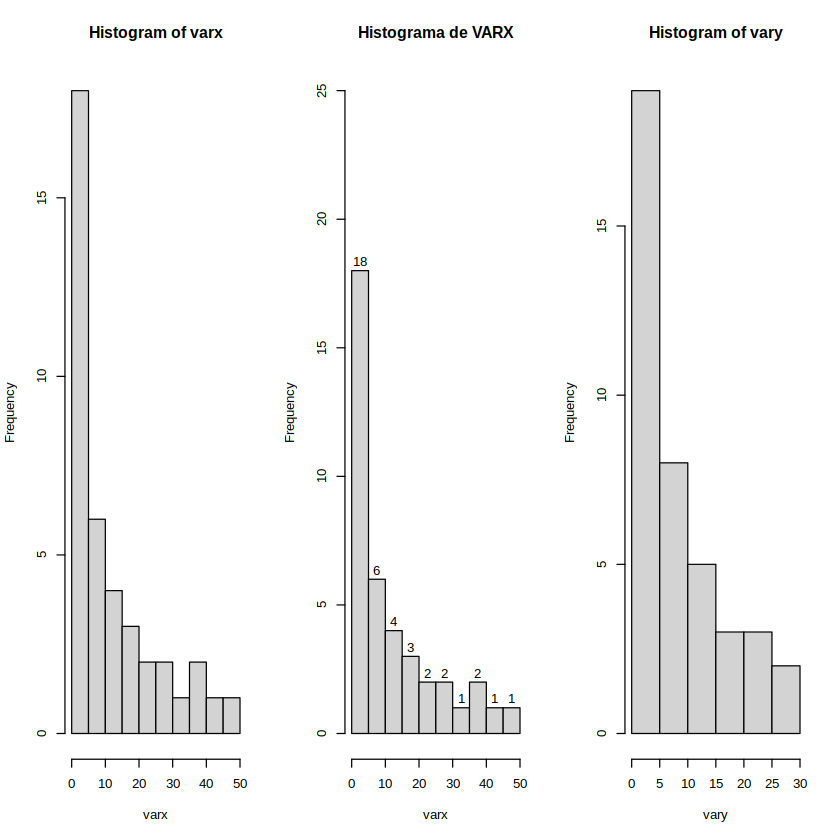

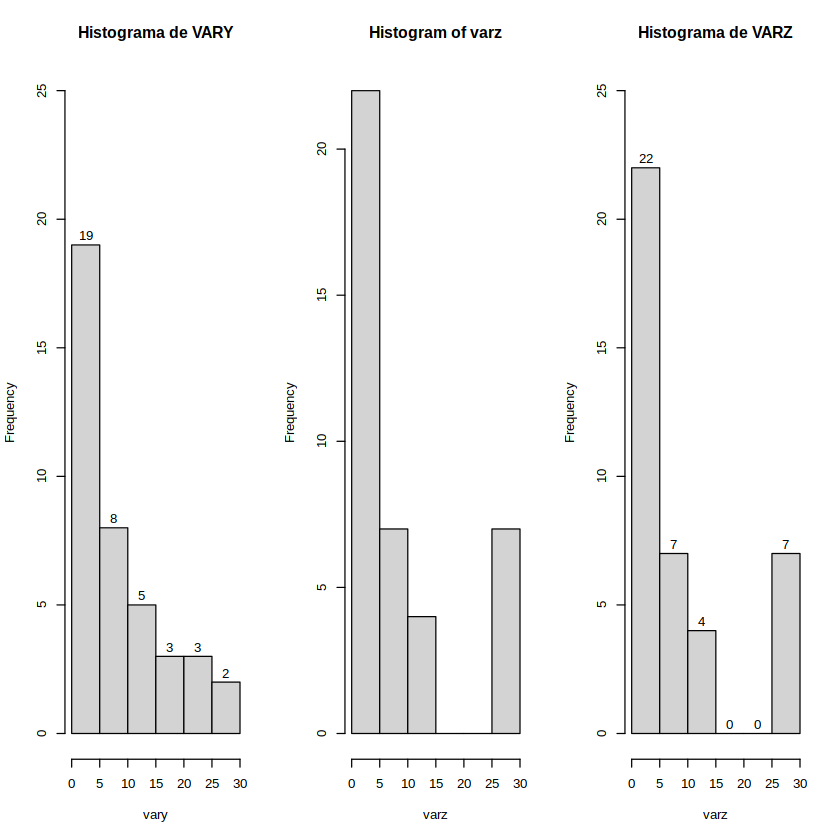

In [32]:
#=============================================
#HISTOGRAMAS - VARX-VARY-VARZ
#=============================================
par(mfrow=c(1,3)) # 1 LINHA 3 COLUNAS (3 graficos por linha)
hist(varx)
hist(varx,labels=TRUE,ylim=c(0,25),main="Histograma de VARX")
hist(vary)
hist(vary,labels=TRUE,ylim=c(0,25),main="Histograma de VARY")
hist(varz)
hist(varz,labels=TRUE,ylim=c(0,25),main="Histograma de VARZ")

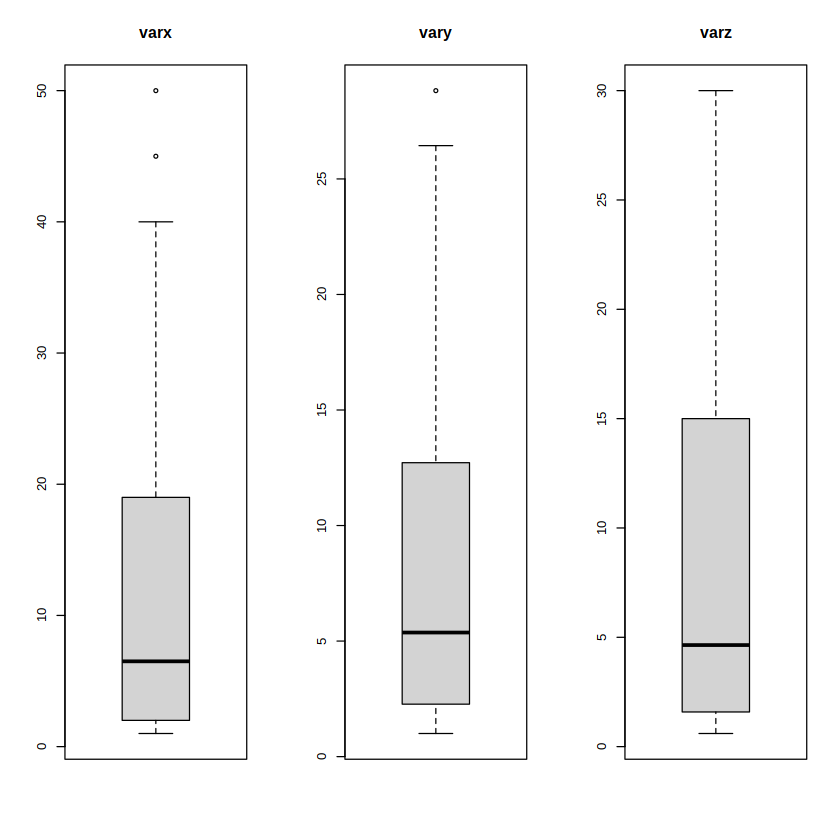

In [33]:
#=============================================
#BOXPLOT-VARX-VARY-VARZ
#=============================================
par(mfrow=c(1,3)) # 1 LINHA 3 COLUNAS (3 gr�ficos por linha)       
boxplot(varx,main="varx")
boxplot(vary,main="vary")
boxplot(varz,main="varz")

In [37]:
iqrx <- q3x -q1x
iqrx

75% 
16.5

In [39]:
varxli <- q1x-1.5*(iqrx)
varxls <- q3x+1.5*(iqrx)
cat("limite_inf = ", varxli, "\n")
cat("limite_sup = ", varxls, "\n")

limite_inf =  -22.75 
limite_sup =  43.25 


In [40]:
summary(varx)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     2.0     6.5    12.5    18.5    50.0 

In [42]:
message("varxli=",varxli,"     varxls=",varxls )

varxli=-22.75     varxls=43.25



In [41]:
varx

[1]  1  1  1  1  1  1  1  2  2  2  2  3  3  3  4  4  4  5  6  6  7  8  9 10 11
[26] 12 13 15 16 18 20 22 24 27 30 33 37 40 45 50

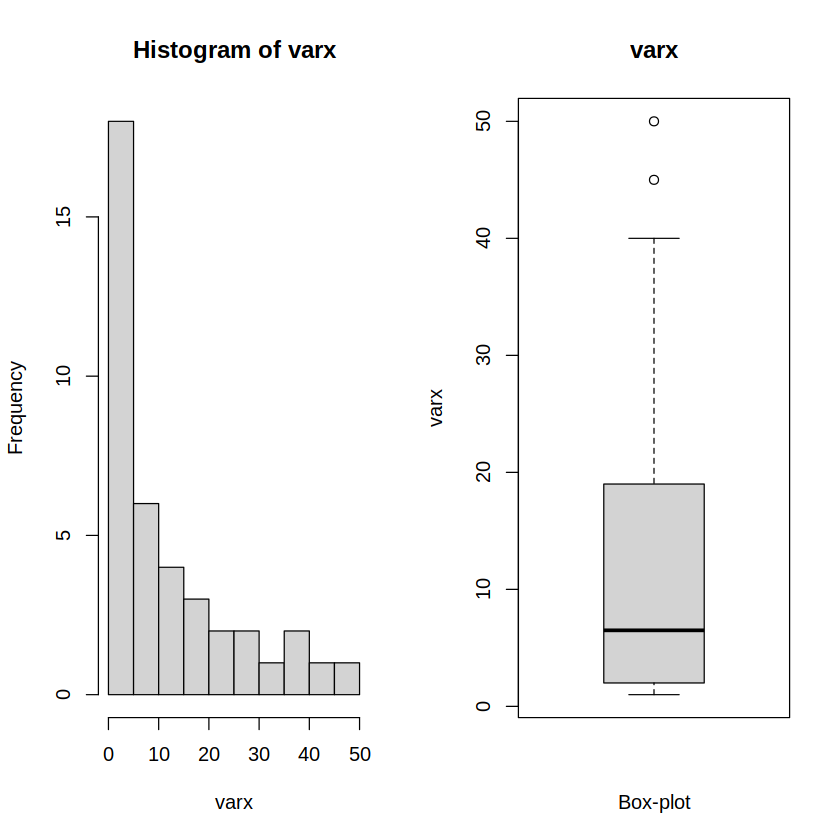

In [46]:
par(mfrow=c(1,2)) # 1 LINHA 3 COLUNAS (3 graficos por linha)
hist(varx)
boxplot(varx, main="varx", xlab="Box-plot", ylab="varx")